In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
dataset = pd.read_csv('Train.csv')

In [3]:
dataset

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
dataset.drop(columns=['ID'], inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [6]:
# checking if there are missing values

dataset.isna().sum() / len(dataset)

Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

In [7]:
# non-delayed deliveries
dataset[dataset['Reached.on.Time_Y.N'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,4436.0,4.147656,1.162771,2.0,3.0,4.0,5.0,7.0
Customer_rating,4436.0,2.967989,1.414808,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,4436.0,214.498647,47.757432,97.0,174.0,222.0,254.0,310.0
Prior_purchases,4436.0,3.670424,1.525444,2.0,3.0,3.0,4.0,10.0
Discount_offered,4436.0,5.545987,2.877727,1.0,3.0,6.0,8.0,10.0
Weight_in_gms,4436.0,4168.668395,1573.954178,1001.0,4043.5,4674.0,5337.0,6000.0
Reached.on.Time_Y.N,4436.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
# delayed deliveries
dataset[dataset['Reached.on.Time_Y.N'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,6563.0,3.991467,1.122592,2.0,3.0,4.0,5.0,7.0
Customer_rating,6563.0,3.005790,1.412692,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,6563.0,207.289197,48.054876,96.0,167.0,209.0,249.0,310.0
Prior_purchases,6563.0,3.498095,1.517285,2.0,3.0,3.0,4.0,10.0
Discount_offered,6563.0,18.663721,19.108797,1.0,5.0,9.0,32.0,65.0
Weight_in_gms,6563.0,3272.640104,1576.148391,1001.0,1735.5,3231.0,4696.5,7846.0
Reached.on.Time_Y.N,6563.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


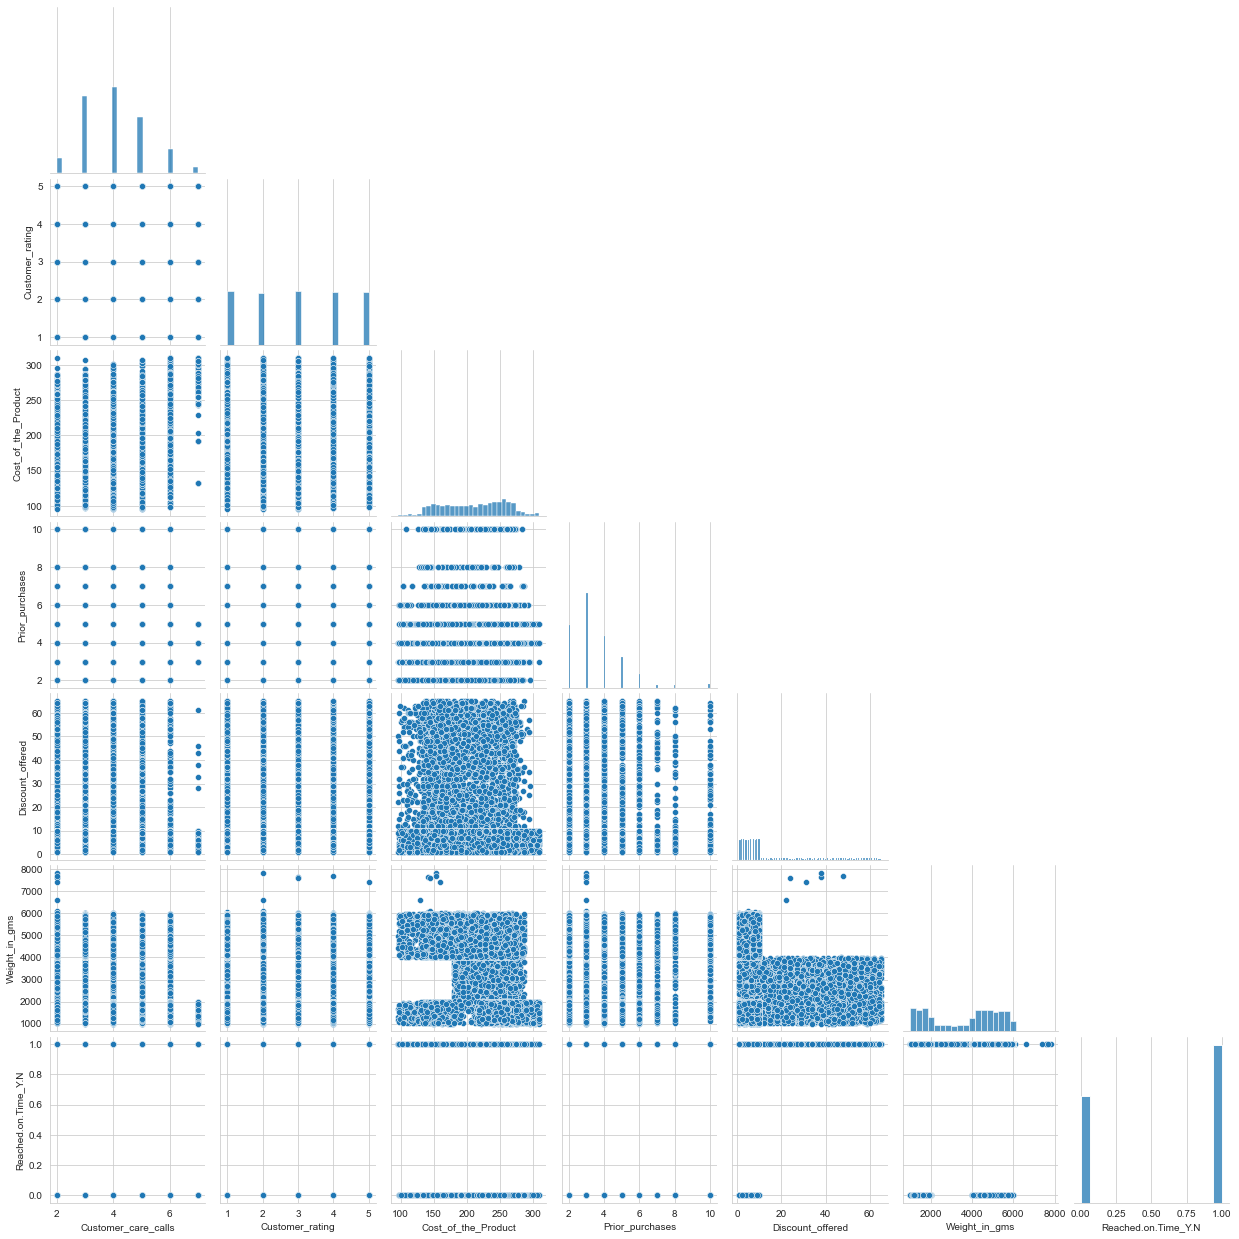

In [9]:
sns.pairplot(dataset, corner=True)

In [10]:
dataset.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

In [11]:
cols = dataset.columns.drop(['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N'])

# columns to split into bins
cols2 = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']


target_col = dataset.columns[-1]
target_col

'Reached.on.Time_Y.N'

In [12]:
# preparing dataframes/visuals to go through


dfs = []

for i in cols:

    df = pd.DataFrame(dataset.groupby(i)[target_col].mean())
    df['value_count'] = dataset.groupby(i)[target_col].count()
    df['value_count_%_of_total'] = (dataset.groupby(i)[target_col].count()/len(dataset))
    
    df.rename(columns={'Reached.on.Time_Y.N' : '%_of_shipments_delayed'}, inplace=True)

    df = (df.style
        .bar(subset=[df.columns[0]], color='#ECC4C4')
        .bar(subset=['value_count'], color='#B1DFB4')
        .bar(subset=['value_count_%_of_total'], color='#B1DFE8')
        .format(formatter={(df.columns[0]): '{:,.1%}',
                           ('value_count_%_of_total'): '{:,.1%}'
                              }))
    
    dfs.append(df)

len(dfs)

7

In [13]:
for i in cols2:

    bins = pd.cut(dataset[i], 10)

    df = pd.DataFrame(dataset.groupby(bins)[target_col].mean())
    df['value_count'] = dataset.groupby(bins)[target_col].count()
    df['value_count_%_of_total'] = (dataset.groupby(bins)[target_col].count()/len(dataset))
    
    df.rename(columns={'Reached.on.Time_Y.N' : '%_of_shipments_delayed'}, inplace=True)
    
    df = (df.style
        .bar(subset=[df.columns[0]], color='#ECC4C4')
        .bar(subset=['value_count'], color='#B1DFB4')
        .bar(subset=['value_count_%_of_total'], color='#B1DFE8')
        .format(formatter={(df.columns[0]): '{:,.1%}',
                           ('value_count_%_of_total'): '{:,.1%}'
                              }))

    dfs.append(df)

len(dfs)

10

In [14]:
dataset['Reached.on.Time_Y.N'].mean()

0.5966906082371125

## EDA

In [15]:
dfs[0]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Warehouse_block,,,
A,58.6%,1833,16.7%
B,60.2%,1833,16.7%
C,59.7%,1833,16.7%
D,59.8%,1834,16.7%
F,59.8%,3666,33.3%


In [16]:
dfs[1]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Mode_of_Shipment,,,
Flight,60.2%,1777,16.2%
Road,58.8%,1760,16.0%
Ship,59.8%,7462,67.8%


In [17]:
dfs[2]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Customer_care_calls,,,
2,65.2%,638,5.8%
3,62.5%,3217,29.2%
4,59.8%,3557,32.3%
5,58.4%,2328,21.2%
6,51.6%,1013,9.2%
7,51.6%,246,2.2%


In [18]:
dfs[3]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Customer_rating,,,
1,58.7%,2235,20.3%
2,58.8%,2165,19.7%
3,60.6%,2239,20.4%
4,59.5%,2189,19.9%
5,60.7%,2171,19.7%


In [19]:
dfs[4]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Prior_purchases,,,
2,62.5%,2599,23.6%
3,64.1%,3955,36.0%
4,54.3%,2155,19.6%
5,49.9%,1287,11.7%
6,56.0%,561,5.1%
7,67.6%,136,1.2%
8,64.8%,128,1.2%
10,57.3%,178,1.6%


In [20]:
dfs[5]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Product_importance,,,
high,65.0%,948,8.6%
low,59.3%,5297,48.2%
medium,59.0%,4754,43.2%


In [21]:
dfs[6]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Gender,,,
F,59.4%,5545,50.4%
M,59.9%,5454,49.6%


In [22]:
dfs[6]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Gender,,,
F,59.4%,5545,50.4%
M,59.9%,5454,49.6%


In [23]:
dfs[7]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Cost_of_the_Product,,,
"(95.786, 117.4]",66.2%,222,2.0%
"(117.4, 138.8]",66.4%,532,4.8%
"(138.8, 160.2]",63.2%,1417,12.9%
"(160.2, 181.6]",63.0%,1331,12.1%
"(181.6, 203.0]",62.2%,1365,12.4%
"(203.0, 224.4]",58.9%,1306,11.9%
"(224.4, 245.8]",57.5%,1630,14.8%
"(245.8, 267.2]",56.1%,1927,17.5%
"(267.2, 288.6]",57.2%,953,8.7%


In [24]:
dfs[8]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Discount_offered,,,
"(0.936, 7.4]",47.3%,5846,53.2%
"(7.4, 13.8]",49.2%,2668,24.3%
"(13.8, 20.2]",100.0%,334,3.0%
"(20.2, 26.6]",100.0%,266,2.4%
"(26.6, 33.0]",100.0%,310,2.8%
"(33.0, 39.4]",100.0%,295,2.7%
"(39.4, 45.8]",100.0%,281,2.6%
"(45.8, 52.2]",100.0%,373,3.4%
"(52.2, 58.6]",100.0%,289,2.6%


In [25]:
dfs[9]

,%_of_shipments_delayed,value_count,value_count_%_of_total
Weight_in_gms,,,
"(994.155, 1685.5]",67.6%,2226,20.2%
"(1685.5, 2370.0]",76.0%,1353,12.3%
"(2370.0, 3054.5]",100.0%,602,5.5%
"(3054.5, 3739.0]",100.0%,624,5.7%
"(3739.0, 4423.5]",53.7%,1537,14.0%
"(4423.5, 5108.0]",42.2%,2071,18.8%
"(5108.0, 5792.5]",43.0%,2001,18.2%
"(5792.5, 6477.0]",41.1%,579,5.3%
"(6477.0, 7161.5]",100.0%,1,0.0%


# PRE-PROCESSING

In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [27]:
dataset = pd.get_dummies(dataset)

In [28]:
dataset.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0


In [29]:
cols = list(dataset.columns.values)
cols.pop(cols.index('Reached.on.Time_Y.N'))
dataset = dataset[cols+['Reached.on.Time_Y.N']]

In [30]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
algo_summary = pd.DataFrame()


algos = ['Logistic Regression', 'K-NN', 'Naive Bayes', 'SVM', 'Kernel SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost']

conf_matrixes = pd.DataFrame(
    index=pd.MultiIndex.from_product([algos, ['1', '0']], names=['Model:', 'Actual:']),
    columns=pd.Index(['1', '0'], name='Predicted:')
)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

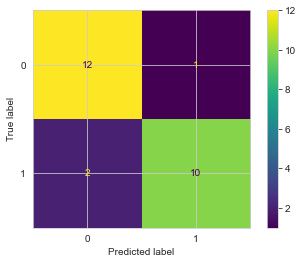

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()

In [36]:
# Making the Confusion Matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

conf_matrixes.loc['Logistic Regression'] = cm

print(cm)
accuracy_score(y_test, y_pred)

[[523 385]
 [417 875]]


0.6354545454545455

In [37]:
# Applying k-Fold Cross Validation

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

algo_summary.loc['Logistic Regression', 'accuracy'] = accuracies.mean()
algo_summary.loc['Logistic Regression', 'stdev'] = accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 64.03 %
Standard Deviation: 1.79 %


# KNN

In [38]:
# Training the K-NN model on the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
# Making the Confusion Matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

conf_matrixes.loc['K-NN'] = cm

print(cm)
accuracy_score(y_test, y_pred)

[[514 394]
 [440 852]]


0.6209090909090909